In [24]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [25]:
df = pd.read_csv("./Pima_NN/diabetes.csv")

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


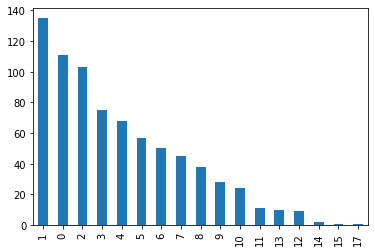

In [27]:
df['Pregnancies'].value_counts().plot(kind = "bar")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
X = df.drop(columns= ["Outcome"])
y = df["Outcome"]

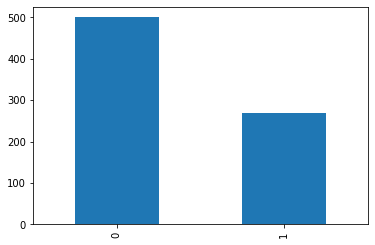

In [30]:
y.value_counts().plot(kind = 'bar')

In [31]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [32]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [33]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [35]:
# def df_split(df, train_instances):
#     df = df.sample(frac = 1).reset_index(drop = True)
#     df_train = df.head(train_instances)
#     rows = df.shape[0]
#     df_test = df.tail(rows-train_instances)
#     return df_train, df_test

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [36]:
model = keras.models.Sequential() 
model.add(keras.layers.Dense(250, input_shape = X_train.shape[1:], activation = 'relu', name = 'hidden1'))
model.add(keras.layers.Dense(100, activation = 'relu', name = 'hidden2'))
model.add(keras.layers.Dense(10, activation = 'softmax', name = 'output'))

In [40]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics='accuracy')

In [41]:
history = model.fit(X_train, y_train, epochs = 30)

Epoch 1/30
18/18 [==============================] - 0s 2ms/step - loss: 2.1084 - accuracy: 0.3750
Epoch 2/30
18/18 [==============================] - 0s 2ms/step - loss: 1.7348 - accuracy: 0.6476
Epoch 3/30
18/18 [==============================] - 0s 2ms/step - loss: 1.4104 - accuracy: 0.6493
Epoch 4/30
18/18 [==============================] - 0s 2ms/step - loss: 1.1540 - accuracy: 0.6528
Epoch 5/30
18/18 [==============================] - 0s 2ms/step - loss: 0.9712 - accuracy: 0.6580
Epoch 6/30
18/18 [==============================] - 0s 2ms/step - loss: 0.8463 - accuracy: 0.6753
Epoch 7/30
18/18 [==============================] - 0s 2ms/step - loss: 0.7591 - accuracy: 0.7135
Epoch 8/30
18/18 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.7309
Epoch 9/30
18/18 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.7483
Epoch 10/30
18/18 [==============================] - 0s 3ms/step - loss: 0.6231 - accuracy: 0.7552
Epoch 11/30
18/18 [

In [42]:
dataframe = pd.DataFrame(history.history)
dataframe

,loss,accuracy
0,2.108378,0.375000
1,1.734772,0.647569
2,1.410401,0.649306
3,1.153968,0.652778
4,0.971209,0.657986
5,0.846327,0.675347
6,0.759076,0.713542
7,0.698507,0.730903
8,0.654567,0.748264
9,0.623141,0.755208


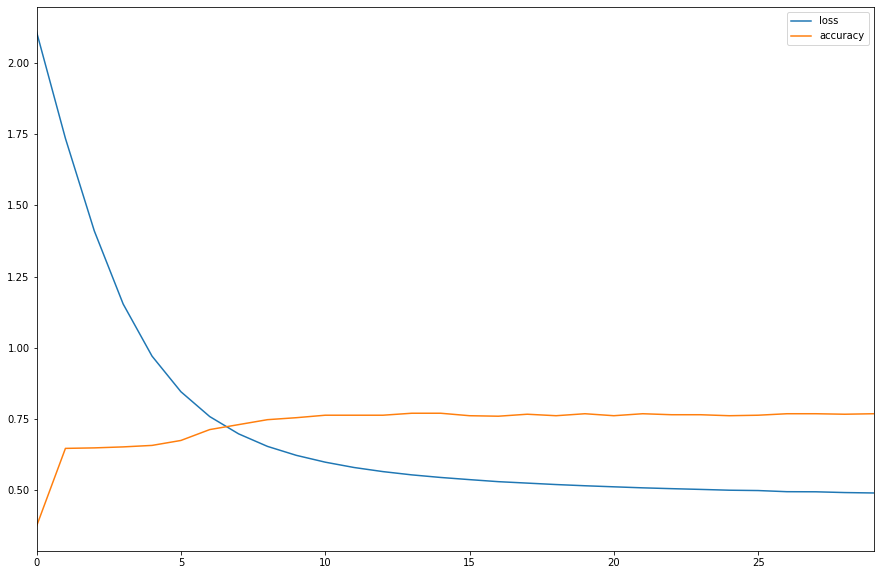

In [43]:
import matplotlib as ply
%matplotlib inline


dataframe.plot(figsize = (15,10))
